In [39]:
import numpy as np
import networkx as nx
import scipy.sparse.linalg as spl

import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
l_5_10 = nx.lollipop_graph(5, 10)

In [41]:
lap = nx.laplacian_matrix(l_5_10)

In [42]:
nx.laplacian_spectrum(l_5_10)

array([  4.37150316e-16,   4.91231715e-02,   2.27482682e-01,
         5.51129984e-01,   1.00000000e+00,   1.53808012e+00,
         2.12054390e+00,   2.69776371e+00,   3.21895574e+00,
         3.63574469e+00,   3.90612554e+00,   5.00000000e+00,
         5.00000000e+00,   5.00000000e+00,   6.05505046e+00])

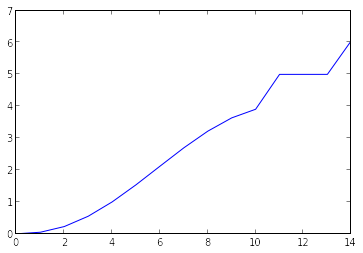

In [43]:
plt.plot(nx.laplacian_spectrum(l_5_10))

In [44]:
def plot_spectrum(graph):
    plt.plot(nx.laplacian_spectrum(graph))
    plt.show()

In [45]:
def plot_lap_spectrum(laplacian):
    eigs = np.linalg.eigvals(laplacian)
    eigs.sort()
    plt.plot(eigs)
    plt.show()

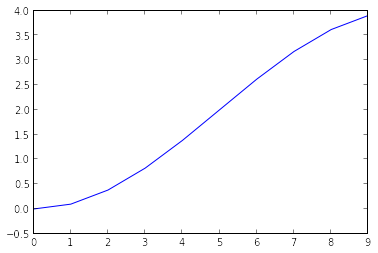

In [46]:
plot_lap_spectrum((nx.laplacian_matrix(nx.path_graph(10)).todense()+0*np.eye(10)))

In [47]:
bb_10_10 = nx.barbell_graph(10,10)

In [48]:
eigs = nx.laplacian_spectrum(bb_10_10)

In [49]:
eigs.shape

(30,)

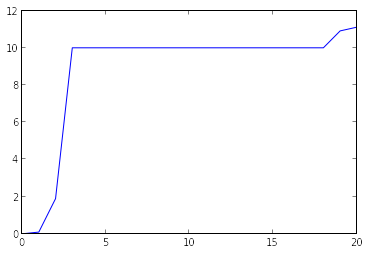

In [50]:
plot_spectrum(nx.barbell_graph(10, 1))

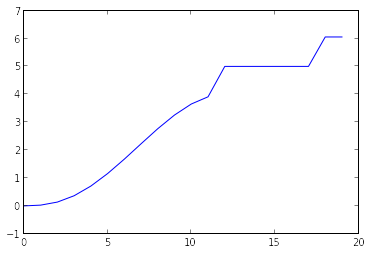

In [51]:
plot_spectrum(nx.barbell_graph(5, 10))

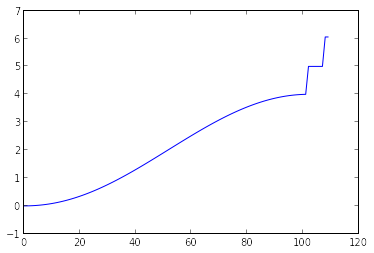

In [52]:
plot_spectrum(nx.barbell_graph(5, 100))

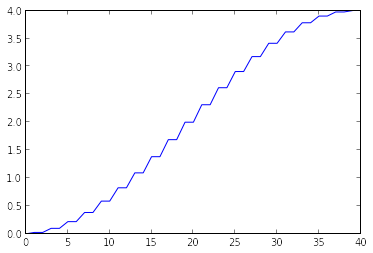

In [53]:
plot_spectrum(nx.cycle_graph(40))

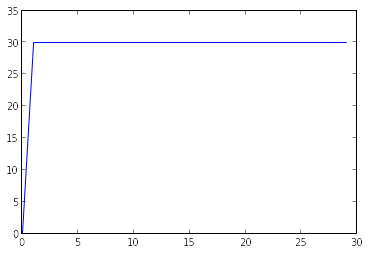

In [54]:
plot_spectrum(nx.complete_graph(30))

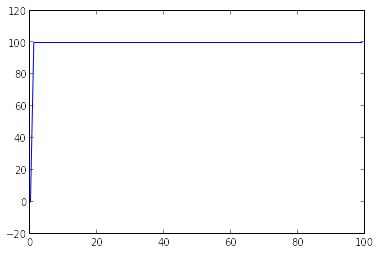

In [55]:
plot_spectrum(nx.complete_graph(100))

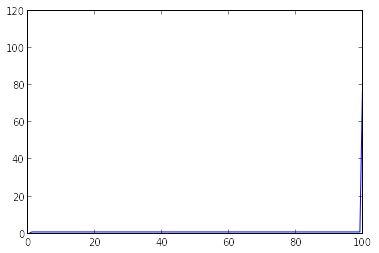

In [56]:
plot_spectrum(nx.star_graph(100))

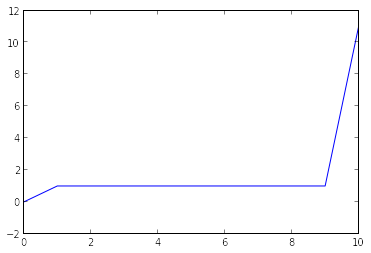

In [57]:
plot_spectrum(nx.star_graph(10))

In [58]:
nx.laplacian_spectrum(nx.star_graph(10))

array([ -7.21644966e-16,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         1.00000000e+00,   1.10000000e+01])

In [59]:
s40 = nx.star_graph(40)

In [60]:
def add_random_edges(graph, prob):
    total = graph.size()
    print("Total verts: ", total)
    for v1 in range(total):
        for v2 in range(v1):
            if not graph.has_edge(v1, v2) and np.random.uniform() <= prob:
                graph.add_edge(v1, v2)
    return graph

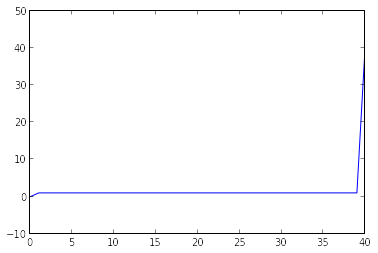

In [61]:
plot_spectrum(s40)

In [62]:
s41 = s40.copy()

In [63]:
s41.size()

40

In [64]:
add_random_edges(s41, 0.01)

('Total verts: ', 40)


In [65]:
s41.size()

47

In [66]:
len(s40.edges())

40

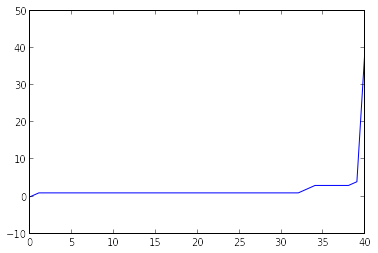

In [67]:
plot_spectrum(s41)

In [68]:
s41_lap = nx.laplacian_matrix(s41)

In [69]:
s41_lap = s41_lap.todense()

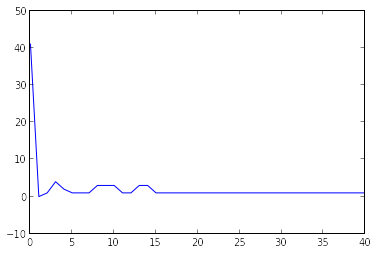

In [70]:
plt.plot(np.linalg.eigvals(s41_lap))

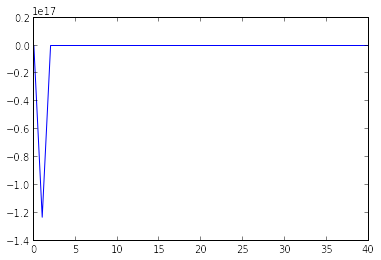

In [71]:
plt.plot(np.linalg.eigvals(np.linalg.inv(s41_lap)))

In [72]:
def get_lap(graph):
    return nx.laplacian_matrix(graph).todense()

In [73]:
get_lap(nx.complete_graph(5))

matrix([[ 4, -1, -1, -1, -1],
        [-1,  4, -1, -1, -1],
        [-1, -1,  4, -1, -1],
        [-1, -1, -1,  4, -1],
        [-1, -1, -1, -1,  4]])

In [74]:
def kernel(l1, l2, gamma=0.1, eta=0.1):
    ident = np.eye(l1.shape[0])
    l_1 = l1 + eta*ident
    l_2 = l2 + eta*ident
    s_1 = np.linalg.inv(l_1) + gamma * ident
    s_2 = np.linalg.inv(l_2) + gamma * ident
    print((s_1 == s_2).all(), " is s1 == s2")
    s_1_inv = np.linalg.inv(s_1)
    s_2_inv = np.linalg.inv(s_2)
    print((s_1 == np.linalg.inv(0.5*s_1_inv+0.5*s_2_inv)).all(), " is s1 == s2")
    z = np.linalg.inv(0.5*s_1_inv+0.5*s_2_inv)
    print(z - s_1_inv)
    numerator = math.sqrt(np.linalg.det(0.5*s_1_inv + 0.5*s_2_inv))
    denominator = math.pow(np.linalg.det(s_1), 0.25) * math.pow(np.linalg.det(s_2), 0.25)
    return numerator / denominator

In [75]:
def compare_det(matrix):
    logdet = np.exp(np.linalg.eigvals(matrix))
    det_logdet = np.exp(np.sum(logdet))
    det = np.linalg.det(matrix)
    print(det_logdet, det)

In [82]:
compare_det(nx.laplacian_matrix(s40).todense()+np.eye(41)*0.1)

(inf, 169.10503671382165)


/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


In [78]:
s40